In [1]:
import os
import shutil
from collections import defaultdict

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import matplotlib
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from math import floor, ceil
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['figure.figsize'] = 20,20
from utils import *

In [14]:
FILENAME = "data/exemple_corecte/rotation_13.jpg"
img = cv2.imread(FILENAME, 0)

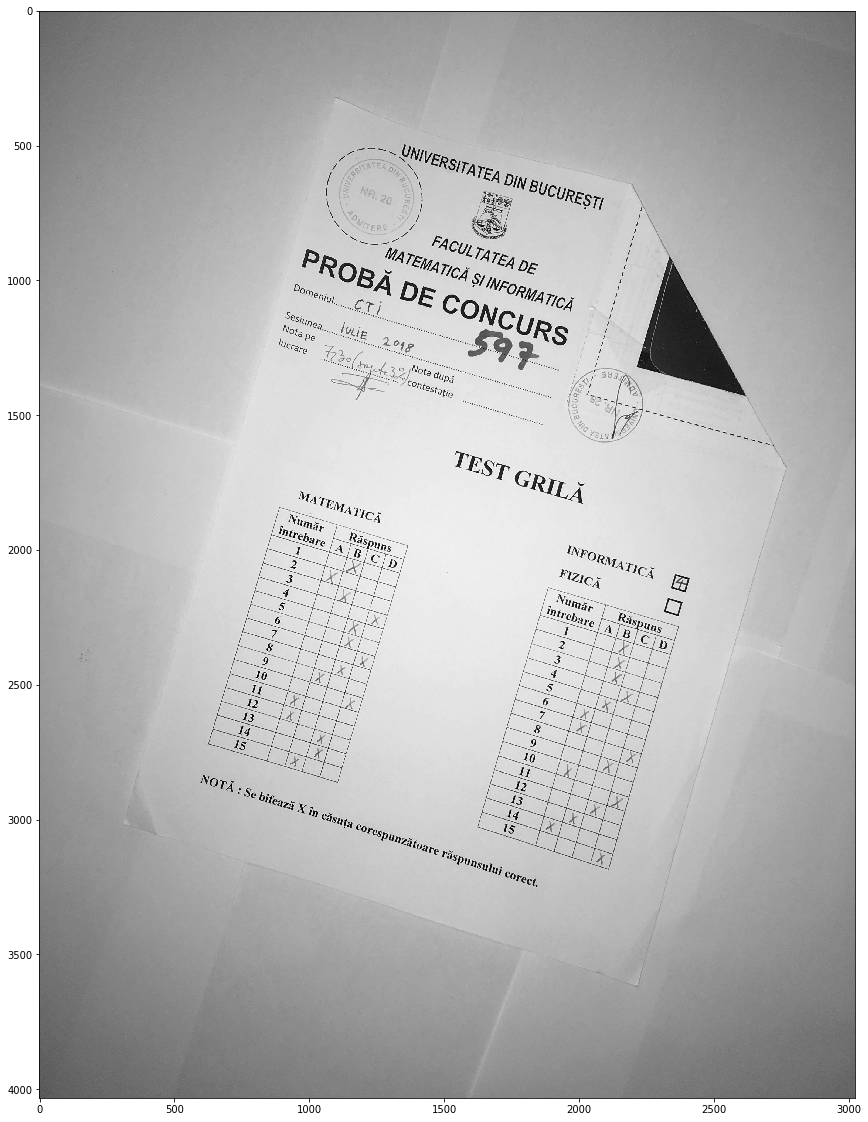

In [15]:
plt.imshow(img)

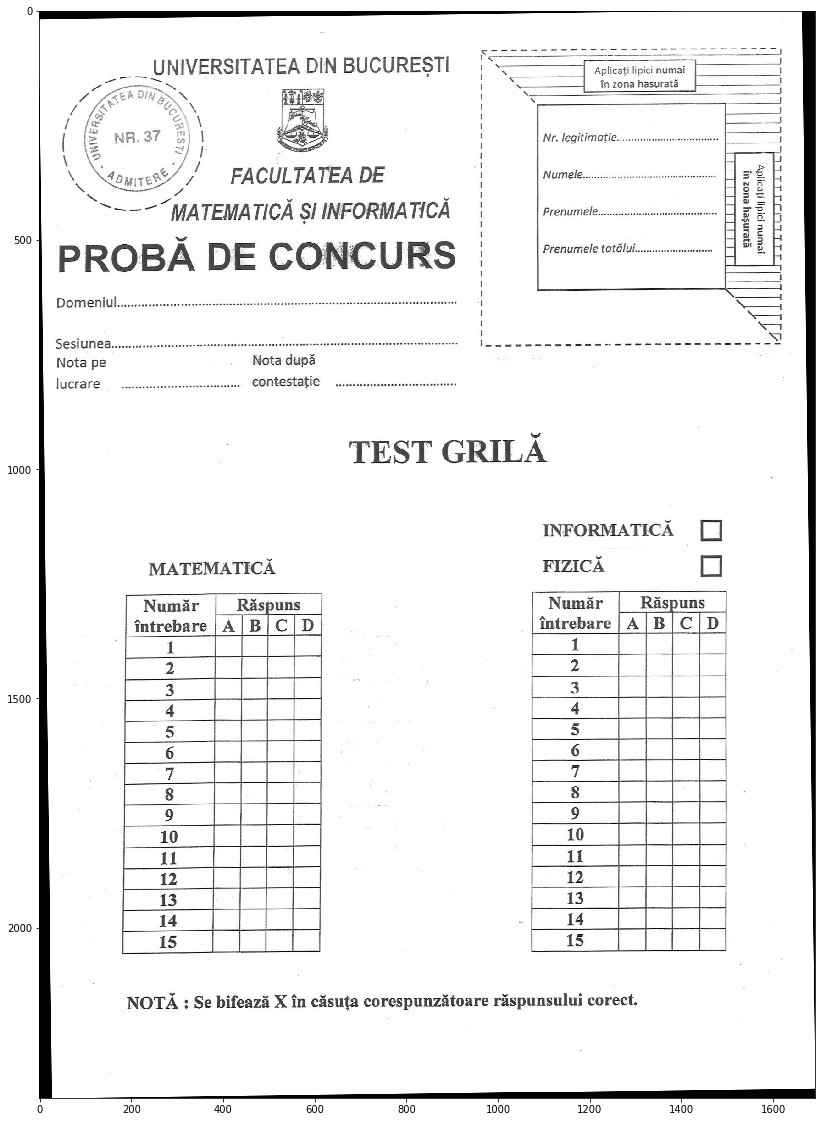

In [25]:
rotated_template = imutils.rotate_bound(template, -0.7)
plt.imshow(rotated_template)

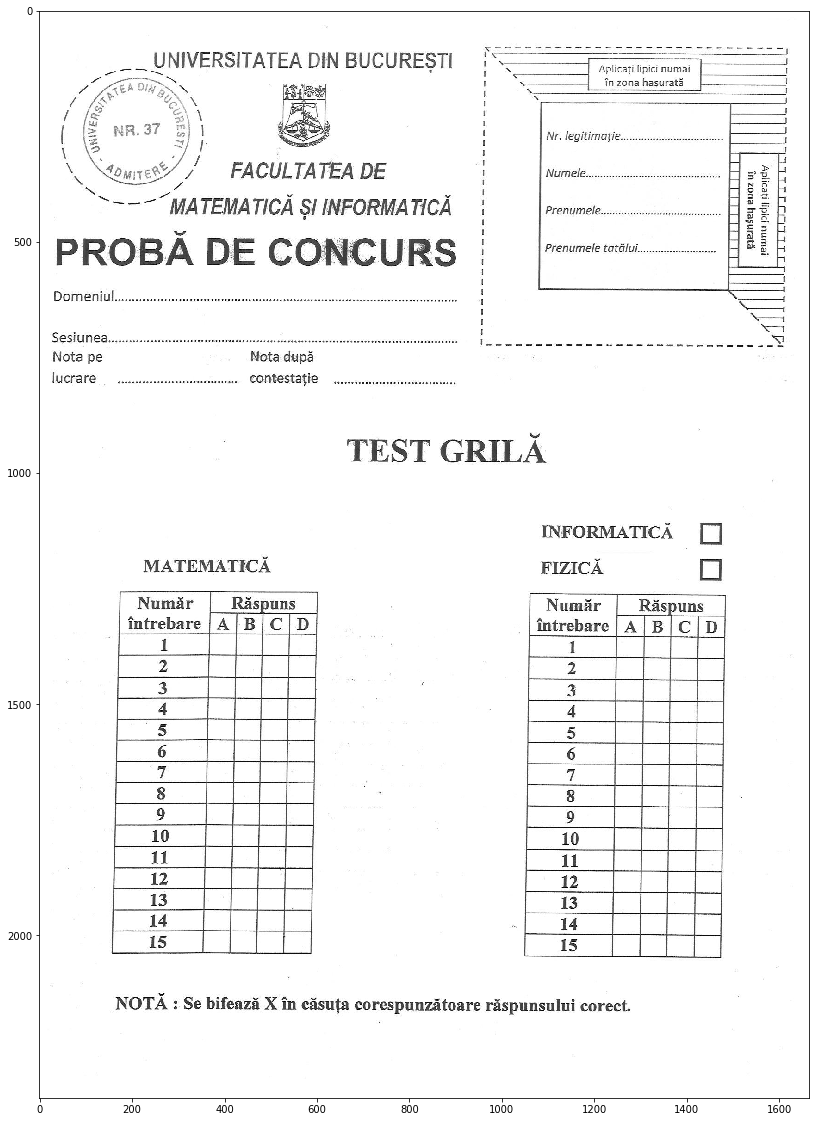

In [32]:
template = cv2.imread("data/template_test_grila.jpg", 0)
plt.imshow(template)

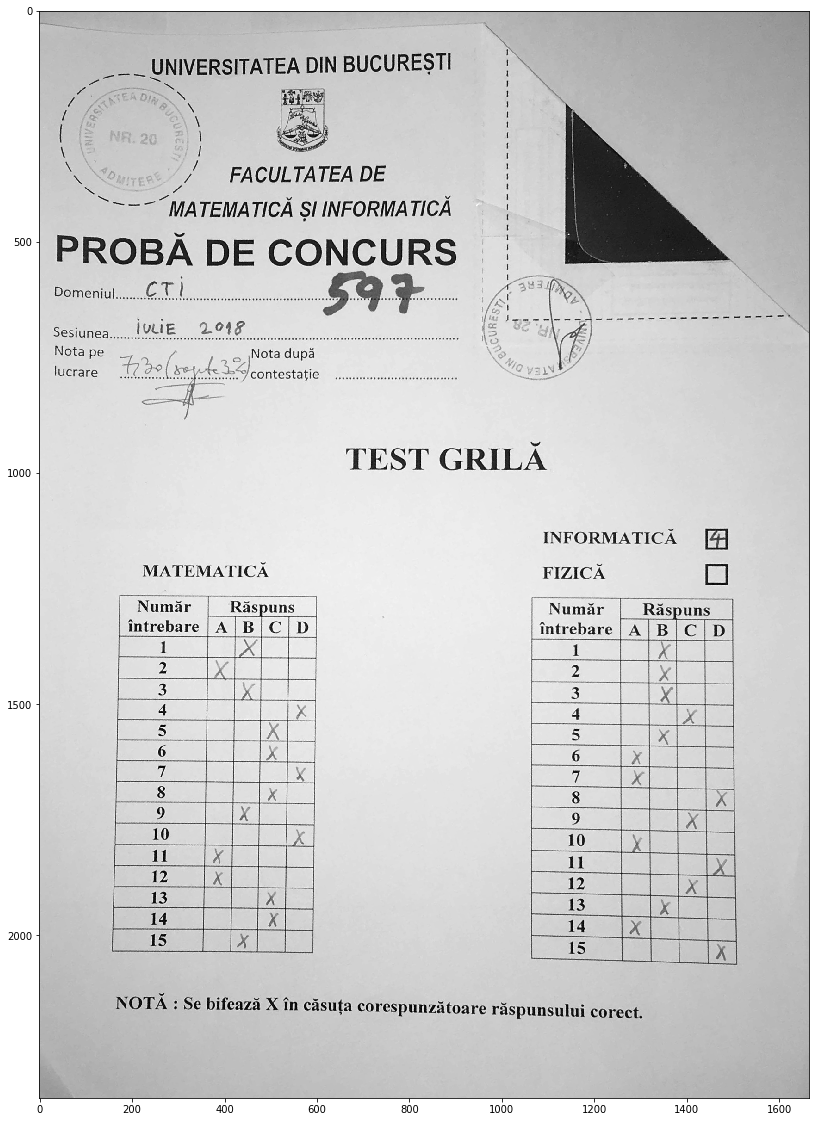

In [34]:
plt.imshow(im1Reg)

In [33]:
 
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15
 
def homography(img, template):
    orb = cv2.ORB_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(img, None)
    keypoints2, descriptors2 = orb.detectAndCompute(template, None)

    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)

    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    matches = matches[:numGoodMatches]

    # Draw top matches
    imMatches = cv2.drawMatches(img, keypoints1, template, keypoints2, matches, None)
    cv2.imwrite("matches.jpg", imMatches)

    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

    # Use homography
    height, width = template.shape
    im1Reg = cv2.warpPerspective(img, h, (width, height))

    return im1Reg, h